<b> Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns

<b> Read File

In [2]:
data = pd.read_csv('Bicycle_Thefts_Open_Data.csv')
df = pd.DataFrame(data)

In [4]:
df.head()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,PRIMARY_OFFENCE,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DAY,...,BIKE_SPEED,BIKE_COLOUR,BIKE_COST,STATUS,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-8.840399e+06,5.413057e+06,1,GO-20141263784,PROPERTY - FOUND,2014/01/01 05:00:00+00,2014,January,Wednesday,1,...,1.0,BLK,NaN,RECOVERED,80,Palmerston-Little Italy,80,Palmerston-Little Italy (80),-79.414654,43.660525
1,-8.843626e+06,5.409539e+06,2,GO-20141261431,THEFT UNDER,2014/01/01 05:00:00+00,2014,January,Wednesday,1,...,10.0,NaN,NaN,STOLEN,85,South Parkdale,85,South Parkdale (85),-79.443645,43.637657
2,-8.838283e+06,5.409903e+06,3,GO-20141263544,B&E,2013/12/26 05:00:00+00,2013,December,Thursday,26,...,21.0,SILRED,1300.0,STOLEN,165,Harbourfront-CityPlace,77,Waterfront Communities-The Island (77),-79.395643,43.640021
3,-8.842059e+06,5.421971e+06,4,GO-20141266048,THEFT UNDER,2013/12/30 05:00:00+00,2013,December,Monday,30,...,24.0,WHI,500.0,STOLEN,39,Bedford Park-Nortown,39,Bedford Park-Nortown (39),-79.429566,43.718425
4,-8.838073e+06,5.410326e+06,5,GO-20149000090,THEFT UNDER,2014/01/01 05:00:00+00,2014,January,Wednesday,1,...,9.0,BLU,1019.0,STOLEN,165,Harbourfront-CityPlace,77,Waterfront Communities-The Island (77),-79.393760,43.642772


In [5]:
df.describe()

,X,Y,OBJECTID,OCC_YEAR,OCC_DAY,OCC_DOY,OCC_HOUR,REPORT_YEAR,REPORT_DAY,REPORT_DOY,REPORT_HOUR,BIKE_SPEED,BIKE_COST,LONG_WGS84,LAT_WGS84
count,3.532500e+04,3.532500e+04,35325.000000,35325.000000,35325.000000,35325.000000,35325.000000,35325.000000,35325.000000,35325.000000,35325.000000,34693.000000,32926.000000,35325.000000,35325.000000
mean,-8.756348e+06,5.365059e+06,17663.000000,2018.442604,15.652880,200.644020,13.289795,2018.464940,15.974013,201.559604,14.229837,14.073358,999.406544,-78.659609,43.270066
std,8.464370e+05,5.186348e+05,10197.593466,2.802540,8.631748,78.515049,6.537182,2.784161,8.598645,78.838236,5.083219,10.674541,1618.407811,7.603673,4.182776
min,-8.863506e+06,5.664924e-09,1.000000,1975.000000,1.000000,1.000000,0.000000,2014.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-79.622226,0.000000
25%,-8.840819e+06,5.411476e+06,8832.000000,2016.000000,8.000000,150.000000,9.000000,2016.000000,9.000000,151.000000,11.000000,6.000000,395.000000,-79.418424,43.650248
50%,-8.837723e+06,5.413315e+06,17663.000000,2018.000000,16.000000,204.000000,14.000000,2018.000000,16.000000,205.000000,14.000000,15.000000,666.000000,-79.390620,43.662203
75%,-8.835727e+06,5.416533e+06,26494.000000,2021.000000,23.000000,259.000000,18.000000,2021.000000,23.000000,260.000000,18.000000,21.000000,1149.997500,-79.372690,43.683112
max,6.327780e-09,5.440289e+06,35325.000000,2024.000000,31.000000,366.000000,23.000000,2024.000000,31.000000,366.000000,23.000000,99.000000,120000.000000,0.000000,43.837237


The World Geodetic System 1984 (WGS84) is a global datum, used for determining positions on the Earth's surface
The Office of the Comptroller of the Currency (OCC) is an independent bureau of the U.S. Department of the Treasury

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35325 entries, 0 to 35324
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  35325 non-null  float64
 1   Y                  35325 non-null  float64
 2   OBJECTID           35325 non-null  int64  
 3   EVENT_UNIQUE_ID    35325 non-null  object 
 4   PRIMARY_OFFENCE    35325 non-null  object 
 5   OCC_DATE           35325 non-null  object 
 6   OCC_YEAR           35325 non-null  int64  
 7   OCC_MONTH          35325 non-null  object 
 8   OCC_DOW            35325 non-null  object 
 9   OCC_DAY            35325 non-null  int64  
 10  OCC_DOY            35325 non-null  int64  
 11  OCC_HOUR           35325 non-null  int64  
 12  REPORT_DATE        35325 non-null  object 
 13  REPORT_YEAR        35325 non-null  int64  
 14  REPORT_MONTH       35325 non-null  object 
 15  REPORT_DOW         35325 non-null  object 
 16  REPORT_DAY         353

<h3> Data Cleansing </h3>

In [4]:
df.isnull().sum()/35325*100

X                     0.000000
Y                     0.000000
OBJECTID              0.000000
EVENT_UNIQUE_ID       0.000000
PRIMARY_OFFENCE       0.000000
OCC_DATE              0.000000
OCC_YEAR              0.000000
OCC_MONTH             0.000000
OCC_DOW               0.000000
OCC_DAY               0.000000
OCC_DOY               0.000000
OCC_HOUR              0.000000
REPORT_DATE           0.000000
REPORT_YEAR           0.000000
REPORT_MONTH          0.000000
REPORT_DOW            0.000000
REPORT_DAY            0.000000
REPORT_DOY            0.000000
REPORT_HOUR           0.000000
DIVISION              0.000000
LOCATION_TYPE         0.000000
PREMISES_TYPE         0.000000
BIKE_MAKE             0.489738
BIKE_MODEL           37.302194
BIKE_TYPE             0.000000
BIKE_SPEED            1.789101
BIKE_COLOUR           8.750177
BIKE_COST             6.791224
STATUS                0.000000
HOOD_158              0.000000
NEIGHBOURHOOD_158     0.000000
HOOD_140              0.000000
NEIGHBOU

<b>% OF NULLS </b><br>
6.79% of BIKE_COST is null - <b>Replace by the median</b> <br>
8.75% of BIKE_COLOUR is null <b>Repalce by the mode</b> <br>
1.78% of BIKE_SPEED is null - <b>Replace by the median</b> <br>
37.3% of BIKE_MODEL is null - <b>Drop column</b> <br>
0.48% of BIKE_MAKE is null - <b>Repalce by the mode</b> <br>

In [3]:
bike_cost_median = df['BIKE_COST'].median()
df['BIKE_COST'].fillna(bike_cost_median, inplace=True)

bike_speed_median = df['BIKE_SPEED'].median()
df['BIKE_SPEED'].fillna(bike_speed_median, inplace=True)

#df.drop('BIKE_MODEL', axis=1, inplace=True)

In [4]:
bike_colour_mode = df['BIKE_COLOUR'].mode()
df['BIKE_COLOUR'].fillna(bike_colour_mode, inplace=True)
def replace_nan_colour(value):
  if type(value) != str:
    return bike_colour_mode
  else:
    return value

df['BIKE_COLOUR'] = df['BIKE_COLOUR'].map(replace_nan_colour)

bike_make_mode = df['BIKE_MAKE'].mode()
df['BIKE_MAKE'].fillna(bike_make_mode, inplace=True)
def replace_nan_make(value):
  if type(value) != str:
    return bike_make_mode
  else:
    return value

df['BIKE_MAKE'] = df['BIKE_MAKE'].map(replace_nan_make)

In [8]:
df.isnull().sum()/35325*100

X                     0.000000
Y                     0.000000
OBJECTID              0.000000
EVENT_UNIQUE_ID       0.000000
PRIMARY_OFFENCE       0.000000
OCC_DATE              0.000000
OCC_YEAR              0.000000
OCC_MONTH             0.000000
OCC_DOW               0.000000
OCC_DAY               0.000000
OCC_DOY               0.000000
OCC_HOUR              0.000000
REPORT_DATE           0.000000
REPORT_YEAR           0.000000
REPORT_MONTH          0.000000
REPORT_DOW            0.000000
REPORT_DAY            0.000000
REPORT_DOY            0.000000
REPORT_HOUR           0.000000
DIVISION              0.000000
LOCATION_TYPE         0.000000
PREMISES_TYPE         0.000000
BIKE_MAKE             0.000000
BIKE_MODEL           37.302194
BIKE_TYPE             0.000000
BIKE_SPEED            0.000000
BIKE_COLOUR           0.000000
BIKE_COST             0.000000
STATUS                0.000000
HOOD_158              0.000000
NEIGHBOURHOOD_158     0.000000
HOOD_140              0.000000
NEIGHBOU

<h3> Temporal Analysis: Analyze temporal trends in bicycle thefts. Are there seasons or times of day when thefts are more frequent? </h3>

In [78]:
df_aux = df.groupby('OCC_YEAR')
amount_category = df_aux.size()

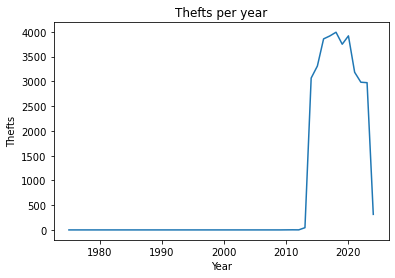

In [80]:
fig, ax = plt.subplots()

ax.plot(amount_category.index, amount_category.values)

ax.set_title('Thefts per year')
ax.set_xlabel('Year')
ax.set_ylabel('Thefts')

plt.show()

<b>Conclusion:</b> The data is relevant as of 2010, prior to that there was no record. In recent years there has been a decrease in the number of robberies.

In [5]:
df_relevant = pd.DataFrame(df.loc[df['OCC_YEAR'] > 2010])

In [6]:
def get_quarter(month):
    if month in ('January', 'February', 'March'):
        return 'Q1'
    elif month in ('April', 'May', 'June'):
        return 'Q2'
    elif month in ('Jule', 'August', 'September'):
        return 'Q3'
    else:
        return 'Q4'

df_relevant['quarter'] = df_relevant['OCC_MONTH'].apply(get_quarter)

In [82]:
df_aux = df_relevant.groupby('quarter')
amount_quarter = df_aux.size()

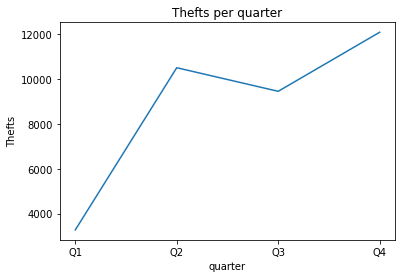

In [83]:
fig, ax = plt.subplots()

ax.plot(amount_quarter.index, amount_quarter.values)

ax.set_title('Thefts per quarter')
ax.set_xlabel('quarter')
ax.set_ylabel('Thefts')

plt.show()

<b>Conclusion:</b> Since 2010, it can be concluded that the majority of robberies occur in the last quarter of the year and the minority in the first quarter of the year.

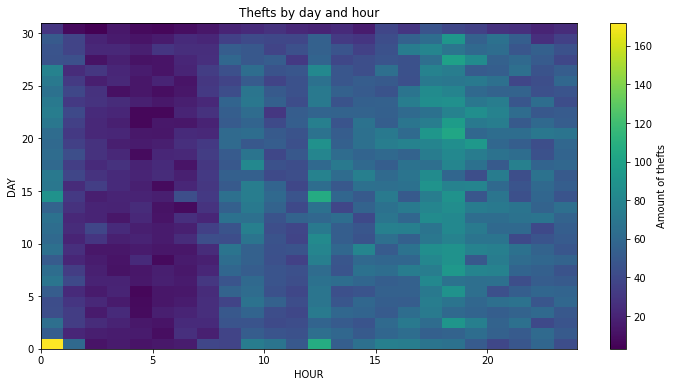

In [96]:
df_agrupado = df_relevant.groupby(['OCC_DAY', 'OCC_HOUR']).size().reset_index(name='count')
data = df_agrupado.pivot_table(index='OCC_DAY', columns='OCC_HOUR', values='count')
data_array = np.array(data)

# Crear el gráfico de calor
plt.figure(figsize=(12, 6))
plt.pcolor(data_array, vmin=data_array.min(), vmax=data_array.max()) 
plt.title('Thefts by day and hour')
plt.xlabel('HOUR')
plt.ylabel('DAY')
plt.colorbar(label='Amount of thefts') 

# Mostrar el gráfico
plt.show()

<b>Conclusion</b> The graph reflects that from 8 in the morning until 1 in the morning is where there is the most presence of robberies, with its peak between 17 and 19

<h3>Geographical Analysis: Map the locations of bicycle thefts. Are there particular areas that are more heavily affected?</h3>

In [7]:
df_aux = df_relevant[['LAT_WGS84', 'LONG_WGS84']]
df_aux = df_aux[:1000]
mapa = folium.Map(location=[df_aux['LAT_WGS84'].mean(), df_aux['LONG_WGS84'].mean()], zoom_start=10)

# Agrega los marcadores al mapa
for i, row in df_aux.iterrows():
    folium.Marker([row['LAT_WGS84'], row['LONG_WGS84']], 
                  popup=f"Punto {i+1}"  # Opcional: agrega un nombre a cada punto
                 ).add_to(mapa)

# Muestra el mapa
mapa

<h3> Profiles of Stolen Bikes: Examine characteristics of stolen bikes (brand, model, color). Are there specific types of bikes that are targeted more often? </h3>

In [42]:
df_stolen_bikes = pd.DataFrame(df_relevant.dropna(subset=['BIKE_MODEL']))

df_stolen_bikes['BIKE_MAKE'] = df_relevant['BIKE_MAKE'].astype(str)
df_stolen_bikes['BIKE_MODEL'] = df_relevant['BIKE_MODEL'].astype(str)
df_stolen_bikes['BIKE_COLOUR'] = df_relevant['BIKE_COLOUR'].astype(str)

In [43]:
grouped = df_stolen_bikes.groupby(['BIKE_MAKE', 'BIKE_MODEL', 'BIKE_COLOUR'])
df_grouped = grouped.size().to_frame(name='Count').reset_index()
df_grouped['aux'] = df_grouped['BIKE_MAKE'] + ' - ' + df_grouped['BIKE_MODEL'] + ' - ' + df_grouped['BIKE_COLOUR']

tot = df_grouped['Count'].sum()
max = df_grouped['Count'].max()
print(max*100/tot)
df_grouped = df_grouped.sort_values(by='Count', ascending=False)
df_grouped['% over the total'] = df_grouped['Count'] * 100 / tot

0.15354046242774566


In [39]:
df_grouped_top15 = df_grouped.head(15)
combination = list(df_grouped_top15['aux'])
percentage_over_the_total = list(df_grouped_top15['% over the total'])

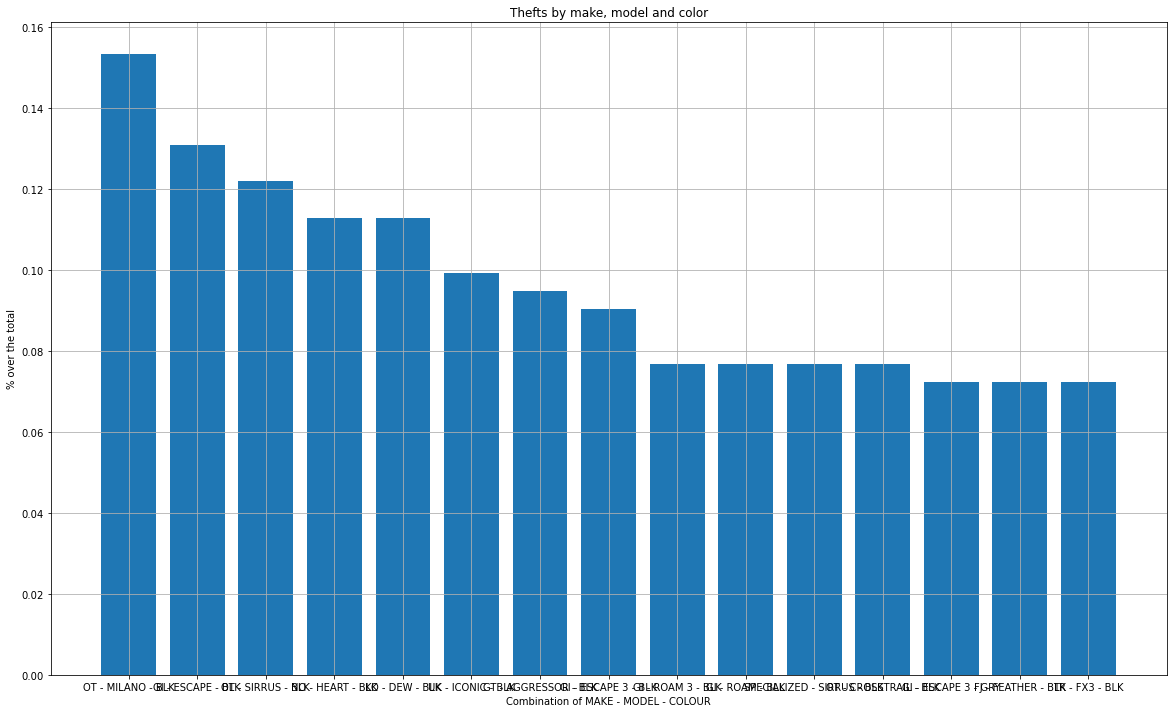

In [49]:
plt.figure(figsize=(20, 12))
plt.bar(combination, percentage_over_the_total)


plt.xlabel("Combination of MAKE - MODEL - COLOUR")
plt.ylabel("% over the total")
plt.title("Thefts by make, model and color")
plt.grid(True)

plt.show()

After removing 37.3% of the sample because it was null the bicycle model, it cannot be concluded that there is any type of bicycle most commonly stolen, since the combination of color, model and make that was most often reported stolen does not even represent 1% of the sample

<h3> Theft Network: Explore the possibility of links between bicycle thefts. Are there patterns indicating organized operations? </h3>

In [83]:
df_grouped_by_year_day = df_relevant.groupby(['OCC_YEAR', 'OCC_DOY']).size().reset_index(name='Thefts by day and year')
df_grouped_by_year_day = df_grouped_by_year_day.sort_values(by='Thefts by day and year', ascending=False)

df_grouped_by_year = df_relevant.groupby('OCC_YEAR').size().reset_index(name='Thefts by year')

df_merged = df_grouped_by_year_day.merge(df_grouped_by_year, on='OCC_YEAR', how='left')
df_merged['OCC_YEAR'] = df_merged['OCC_YEAR'].astype(str)
df_merged['OCC_DOY'] = df_merged['OCC_DOY'].astype(str)

df_merged['% of the day in the year'] = df_merged['Thefts by day and year']*100/df_merged['Thefts by year']
df_merged = df_merged.sort_values(by='% of the day in the year', ascending=False)
df_merged['aux'] = df_merged['OCC_YEAR'] + ' - ' + df_merged['OCC_DOY']

df_merged_gt50 = df_merged.loc[df_merged['Thefts by year'] > 50]
df_merged_gt50 = df_merged_gt50.sort_values(by='% of the day in the year', ascending=False)
df_merged_top20 = df_merged_gt50.head(20)

In [84]:
df_merged_top20

,OCC_YEAR,OCC_DOY,Thefts by day and year,Thefts by year,% of the day in the year,aux
1192,2024,73,12,315,3.809524,2024 - 73
1204,2024,12,12,315,3.809524,2024 - 12
1902,2024,54,8,315,2.539683,2024 - 54
2151,2024,86,7,315,2.222222,2024 - 86
2147,2024,2,7,315,2.222222,2024 - 2
2079,2024,5,7,315,2.222222,2024 - 5
2074,2024,53,7,315,2.222222,2024 - 53
2050,2024,39,7,315,2.222222,2024 - 39
2033,2024,44,7,315,2.222222,2024 - 44
2012,2024,22,7,315,2.222222,2024 - 22


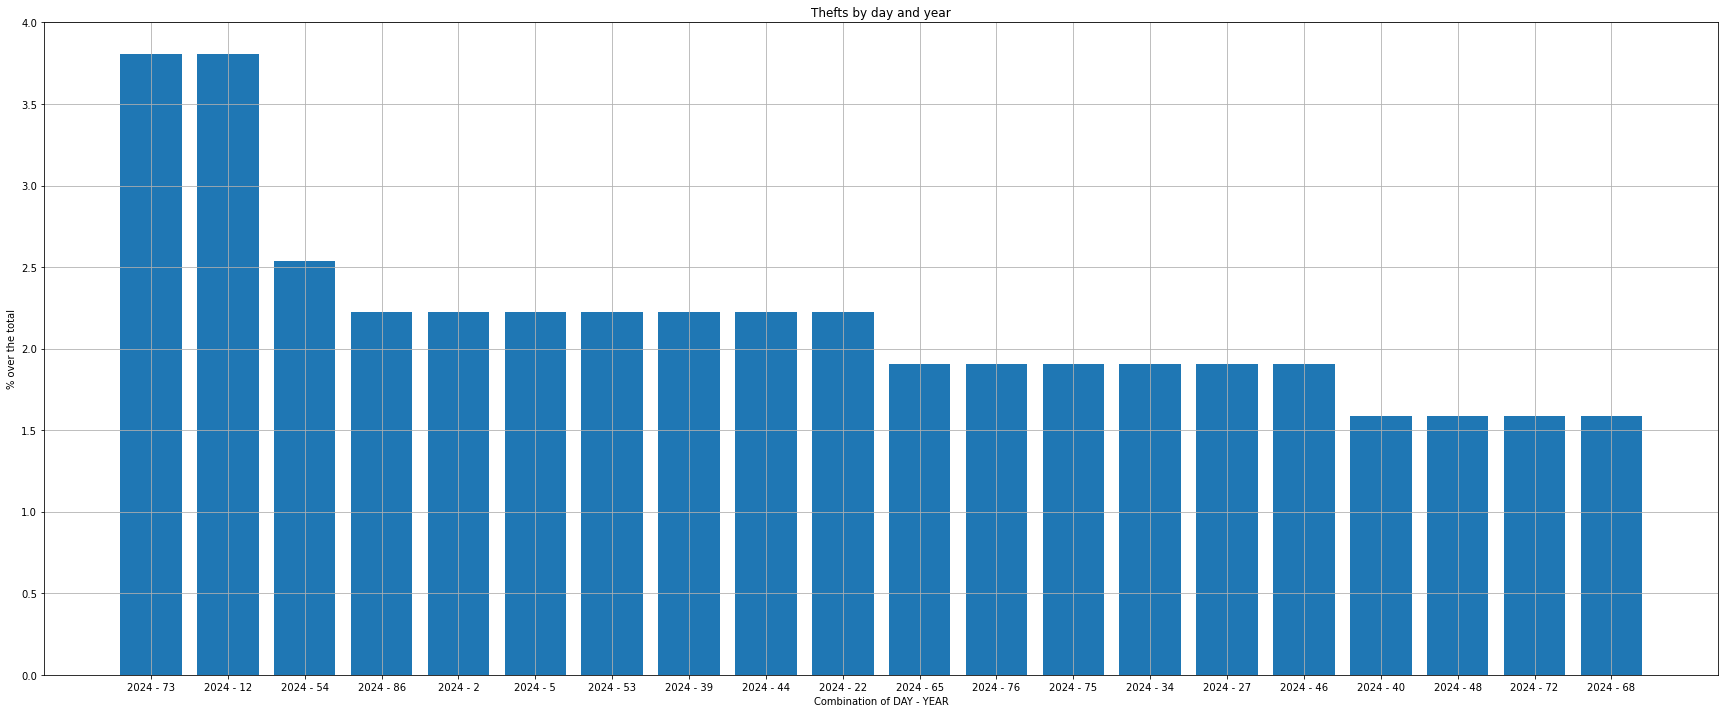

In [85]:
plt.figure(figsize=(30, 12))
combination = list(df_merged_top20['aux'])
values = list(df_merged_top20['% of the day in the year'])
plt.bar(combination, values)


plt.xlabel("Combination of DAY - YEAR")
plt.ylabel("% over the total")
plt.title("Thefts by day and year")
plt.grid(True)

plt.show()

<b> Conclusion:</b> In my opinion, when analyzing the number of robberies carried out per year and day and arbitrarily taking into account years in which more than 50 robberies have been carried out, it cannot be concluded that there has been organized robbery activity.

In [76]:
week = 1
aux = 1
weeks = dict()
for n in range(1, 367):
    week_string = 'Week ' + str(week)
    if aux == 1:
        weeks[week_string] = list()
        weeks[week_string].append(n)
    else:
        weeks[week_string].append(n)
    aux += 1
    if aux == 8:
        week += 1
        aux = 1
#week    

In [77]:
def assing_week(doy):
    for week in weeks:
        if doy in weeks[week]:
            return week

df_relevant['WOY'] = df['OCC_DOY'].map(assing_week)

In [86]:
df_grouped_by_year_week = df_relevant.groupby(['OCC_YEAR', 'WOY']).size().reset_index(name='Thefts by week and year')
df_grouped_by_year_week = df_grouped_by_year_week.sort_values(by='Thefts by week and year', ascending=False)

df_grouped_by_year = df_relevant.groupby('OCC_YEAR').size().reset_index(name='Thefts by year')

df_merged = df_grouped_by_year_week.merge(df_grouped_by_year, on='OCC_YEAR', how='left')
df_merged['% of the week in the year'] = df_merged['Thefts by week and year']*100/df_merged['Thefts by year']
df_merged = df_merged.sort_values(by='% of the week in the year', ascending=False)

df_merged['OCC_YEAR'] = df_merged['OCC_YEAR'].astype(str)
df_merged['aux'] = df_merged['OCC_YEAR'] + ' - ' + df_merged['WOY']

df_merged_gt50 = df_merged.loc[df_merged['Thefts by year']>50]
df_merged_top20 = df_merged_gt50.sort_values(by='% of the week in the year', ascending=False).head(20)


df_merged_top20

,OCC_YEAR,WOY,Thefts by week and year,Thefts by year,% of the week in the year,aux
350,2024,Week 11,37,315,11.746032,2024 - Week 11
377,2024,Week 8,32,315,10.158730,2024 - Week 8
404,2024,Week 1,27,315,8.571429,2024 - Week 1
410,2024,Week 6,26,315,8.253968,2024 - Week 6
411,2024,Week 7,26,315,8.253968,2024 - Week 7
412,2024,Week 2,25,315,7.936508,2024 - Week 2
422,2024,Week 5,24,315,7.619048,2024 - Week 5
432,2024,Week 10,23,315,7.301587,2024 - Week 10
447,2024,Week 13,22,315,6.984127,2024 - Week 13
451,2024,Week 4,21,315,6.666667,2024 - Week 4


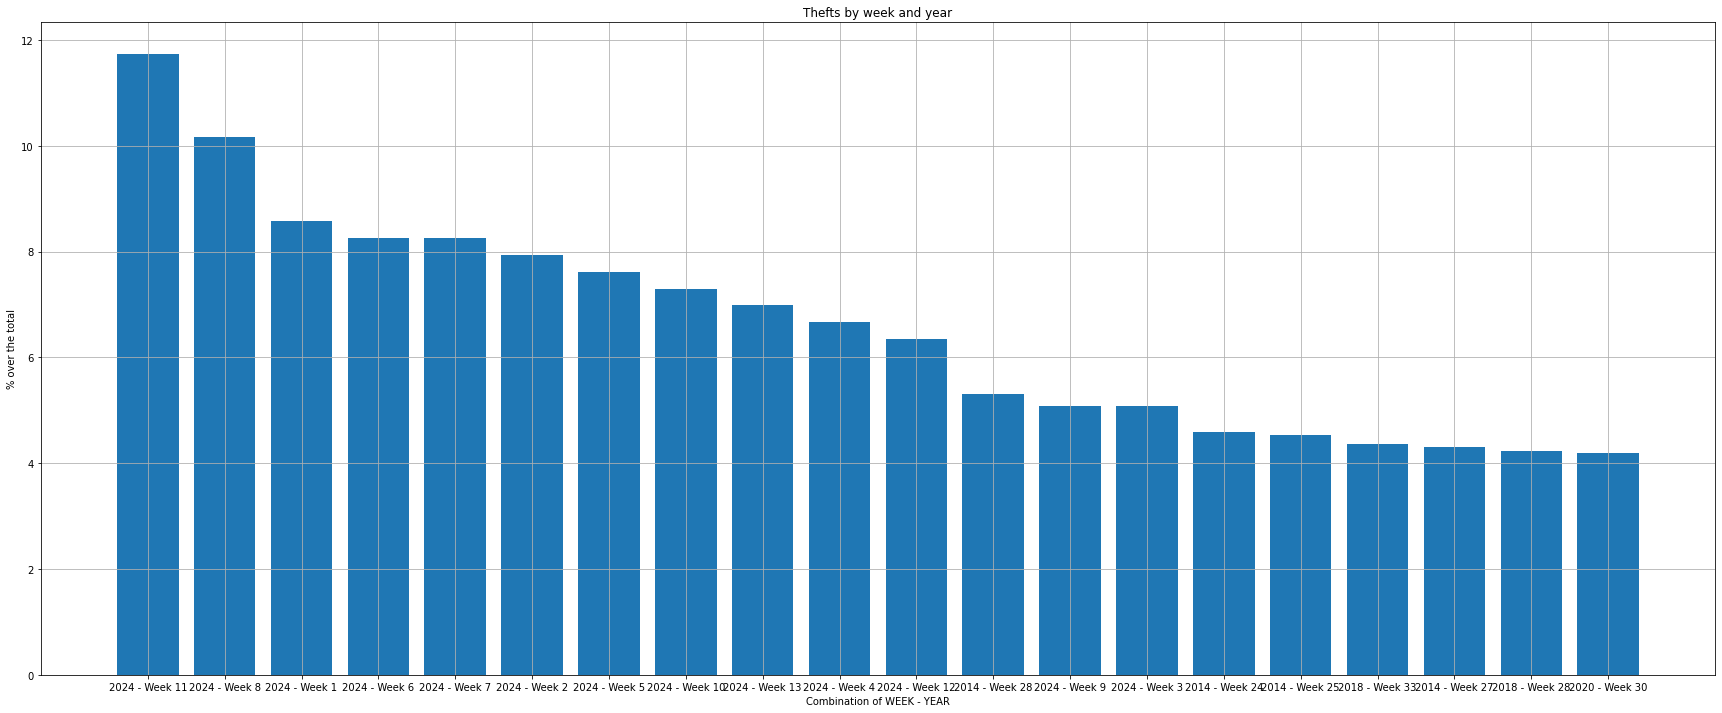

In [87]:
plt.figure(figsize=(30, 12))
combination = list(df_merged_top20['aux'])
values = list(df_merged_top20['% of the week in the year'])
plt.bar(combination, values)


plt.xlabel("Combination of WEEK - YEAR")
plt.ylabel("% over the total")
plt.title("Thefts by week and year")
plt.grid(True)

plt.show()

<b> Conclusion:</b> Analyzing the previous point from another point of view, when taking into account the week of the year instead of the day of the year, it can be seen that in the year 2024 a significant percentage of the total robberies of said year occurred in specific weeks, which may indicate organized crime activity of robberies

<h3>Predictive Factors: Identify potential predictive factors for bicycle thefts. This could include variables such as weather, holidays, etc.</h3>

In [121]:
df_grouped_by_hood = df_relevant.groupby('NEIGHBOURHOOD_158').size().reset_index(name='Thefts by hood')

tot = df_grouped_by_hood['Thefts by hood'].sum()
df_grouped_by_hood['% Thefts by hood over the total'] = df_grouped_by_hood['Thefts by hood'] * 100 / tot
df_top28 = df_grouped_by_hood.sort_values(by='% Thefts by hood over the total', ascending=False).head(28)
print(df_top28['NEIGHBOURHOOD_158'])
print('This 28 neighbourhoods reperesent: ' + str(df_top28['% Thefts by hood over the total'].sum()) + '% of the total thefts')

153                       Yonge-Bay Corridor
36                       Downtown Yonge East
138                         Wellington Place
126    St Lawrence-East Bayfront-The Islands
3                                      Annex
74                      Kensington-Chinatown
93                                 Moss Park
25                          Church-Wellesley
57                    Harbourfront-CityPlace
136                               University
125                          South Riverdale
7                             Bay-Cloverhill
52                 Fort York-Liberty Village
119                      Rosedale-Moore Park
141                          West Queen West
21           Cabbagetown-South St.James Town
135                        Trinity-Bellwoods
71                  Junction-Wallace Emerson
109                  Palmerston-Little Italy
102                      North St.James Town
83                           Little Portugal
59                           High Park North
38        

In [122]:
tot_neighbourhoods = df_grouped_by_hood['NEIGHBOURHOOD_158'].nunique()
print('Total amount of neighbourhoods: ' + str(tot_neighbourhoods))
print('The 28 neighbourhoods with most thefts represent: ' + str(tot_neighbourhoods/28) +'% of the neighbourhoods')

Total amount of neighbourhoods: 159
The 28 neighbourhoods with most thefts represent: 5.678571428571429% of the neighbourhoods


<b> Conclusion</b> Just by making 5% of the total neighborhoods safer, 63% of robberies can be eliminated.

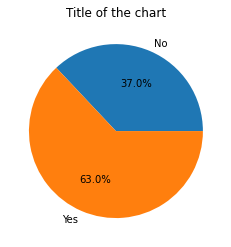

In [123]:
df_top28['top28'] = 'Yes'

df_merge = df_grouped_by_hood.merge(df_top28[['NEIGHBOURHOOD_158', 'top28']], how='left', on='NEIGHBOURHOOD_158')
df_merge['top28'].fillna('No', inplace=True)
df_grouped_by_hood_top28 = df_merge.groupby('top28')['% Thefts by hood over the total'].sum().reset_index(name='Thefts by hood')

plt.pie(df_grouped_by_hood_top28['Thefts by hood'], labels=df_grouped_by_hood_top28['top28'], autopct="%1.1f%%")  
plt.title("Title of the chart")
plt.show()